**Teste de hipótese 1:** Hipótese nula -> a media de contas criadas (por mês/dia) em 2020 é similar a de contas criadas em 2019.

Importando bibliotecas necessárias.

In [2]:
# BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import rc
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

rc('font', **font)

plt.style.use('seaborn-colorblind')
plt.ion()

Importando a base de dados utilizada e transformando a coluna de tempo que estava em UNIX time para notação de datetime.

In [3]:
df_jogadores = pd.read_csv("br_players.csv")
df_jogadores["last_online"] = pd.to_datetime(df_jogadores["last_online"],unit="s")
df_jogadores["date_joined"] = pd.to_datetime(df_jogadores["date_joined"],unit="s")
df_jogadores["year_joined"] = df_jogadores["date_joined"].dt.year
df_jogadores["month_joined"] = df_jogadores["date_joined"].dt.month
df_jogadores

,id,username,country,followers,last_online,date_joined,has_title,account_status,title,rating_bullet,rating_blitz,rating_rapid,year_joined,month_joined
0,5685093,-lh,BR,3,2021-02-02 04:55:32,2011-08-27 04:50:17,False,basic,None,1246,1545,0,2011,8
1,115076418,000000tiago,BR,0,2021-02-01 19:21:29,2021-01-23 15:04:57,False,basic,None,1220,0,0,2021,1
2,78469178,00000al,BR,1,2021-02-02 02:13:31,2020-05-03 10:41:46,False,basic,None,0,863,817,2020,5
3,105481462,00000d,BR,0,2021-02-01 22:37:28,2020-12-19 09:09:51,False,basic,None,971,891,915,2020,12
4,85274162,0002vinicius,BR,0,2021-02-02 00:00:14,2020-07-01 18:37:22,False,basic,None,901,537,0,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140862,94845114,zzzsonolento,BR,0,2021-02-01 20:11:25,2020-11-02 18:39:56,False,basic,None,0,0,0,2020,11
140863,88020990,zz_m,BR,0,2021-02-01 23:21:37,2020-07-31 23:31:45,False,basic,None,866,962,0,2020,7
140864,5965057,_excel_,BR,1,2021-02-03 19:25:32,2011-10-16 17:12:05,False,basic,None,1637,1872,0,2011,10
140865,117172078,victor_rafih,BR,1,2021-02-05 06:46:19,2021-01-30 20:50:57,False,basic,None,912,0,0,2021,1


Faz bootstrap para os anos de 2019 e 2020 com uma tamanho de amostra de 15000 contas e 1000 iterações , com probabilidades teoricas iguais para cada ano. Depois plota a porcentagem de contas criadas em 2020 real.

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


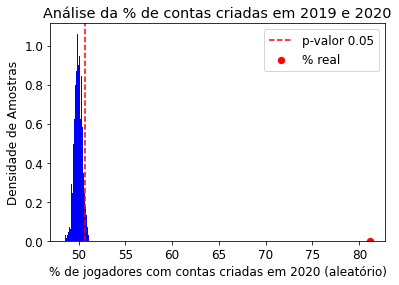

In [4]:
lista_meses = [1,2,3,4,5,6,7,8,9,10,11,12]
lista_anos = [2019,2020]
tamanho_amostra = 15000
n_iter = 1000
lista_jogadores_probigual = list()
for ano in lista_anos:
    prob = 1/len(lista_anos)
    #print(prob)
    n_anos = int(prob*tamanho_amostra)
    #print(n_anos)
    lista_ano = n_anos*[ano]
    lista_jogadores_probigual = lista_jogadores_probigual + lista_ano
lista_samples_resul = list()
for i in range(n_iter):
        sample = random.choices(lista_jogadores_probigual,k=tamanho_amostra)
        proporcao_2020 = 100*sample.count(2020)/len(sample)
        #print(proporcao_2020)
        lista_samples_resul.append(proporcao_2020)
    
plt.xlabel("% de jogadores com contas criadas em 2020 (aleatório)")
plt.ylabel("Densidade de Amostras")
plt.hist(lista_samples_resul,bins=40,color='b',density=True)
plt.title("Análise da % de contas criadas em 2019 e 2020")
plt.axvline(np.percentile(lista_samples_resul,95),linestyle = 'dashed',color='r',label="p-valor 0.05")
proporcao_jogadores_2020 = 100*len(df_jogadores[(df_jogadores["year_joined"] == 2020)])/len(df_jogadores[(df_jogadores["year_joined"] == 2020) | (df_jogadores["year_joined"] == 2019)])
plt.scatter(proporcao_jogadores_2020, 0, color='r', s=40,label="% real")
plt.legend()
plt.savefig("teste_hipotese.pdf")